# detect.py test

In [21]:
path = 'C:/Users/AI/Auto_Farming/yolov5/'
weight = 'C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
rs = !python {path}detect6.py --weight {weight} --source 0 --save-txt --exist-ok --hide-conf --hide-labels

for i, j in enumerate(rs):
    if i > 5:
        print(j)


-----------SYNARIO-----------
인삼 검출 갯수 : 11
컨베이어 멈춤
정상 검출 갯수 : 9
피더 멈춤
그리퍼 각도 : 45
좌표 : 498, 187
-----------------------------
0 0 45 498 187
-----------------------------
 
 
-----------SYNARIO-----------
인삼 검출 갯수 : 11
컨베이어 멈춤
정상 검출 갯수 : 8
피더 멈춤
그리퍼 각도 : 315
좌표 : 508, 411
-----------------------------
0 0 315 508 411
-----------------------------
 
 
-----------SYNARIO-----------
인삼 검출 갯수 : 11
컨베이어 멈춤
정상 검출 갯수 : 8
피더 멈춤
그리퍼 각도 : 270
좌표 : 221, 475
-----------------------------
0 0 270 221 475
-----------------------------
 
 
-----------SYNARIO-----------
인삼 검출 갯수 : 4
컨베이어 멈춤
정상 검출 갯수 : 2
피더 작동
그리퍼 각도 : None
좌표 : None, None
-----------------------------
0 1 None None None
-----------------------------
 
 
-----------SYNARIO-----------
인삼 검출 갯수 : 13
컨베이어 멈춤
정상 검출 갯수 : 11
피더 멈춤
그리퍼 각도 : 315
좌표 : 231, 236
-----------------------------
0 0 315 231 236
-----------------------------
 
 
-----------SYNARIO-----------
인삼 검출 갯수 : 1
컨베이어 작동
정상 검출 갯수 : 0
피더 멈춤
그리퍼 각도 : None
좌표 : None, None
-----

In [ ]:
# print(j) if i > 5 else print('', end='') for i, j in enumerate(rs)

# image test

In [8]:
import os
import glob
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

frame_img_path = 'C:/Users/AI/Auto_Farming/yolov5/image/capture.png'
exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
path = 'C:/Users/AI/Auto_Farming/yolov5/'
weight = 'C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
source = 'C:/Users\AI/Auto_Farming/image/capture.png' 
coordinate_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/"

In [ ]:
rs = !python {path}detect3.py --weight {weight} --source {source} --save-txt --exist-ok --hide-conf --hide-labels

In [15]:
import os
import sys
import glob
from pathlib import Path
import math
import numpy as np

# FILE = Path(__file__).resolve()
# ROOT = FILE.parents[0]/'runs/detect/exp/'

gc, hc, ga, da = [], [], [], []
min_gl, a = float('inf'), 0

with open(coordinate_path+"capture.txt", "r") as f:
    txt = f.readlines()  

[gc.append(i) if i[0] == '0' else hc.append(i) for i in txt]

gn, hn, p = len(gc), len(hc), 0

for i in range(gn):
    g = gc[i][2:-1].split(' ')
    gltx, glty, grbx, grby = int(g[0]), int(g[1]), int(g[2]), int(g[3])
    lt, rt, lb, rb = [gltx, glty], [grbx, glty], [gltx, grby], [grbx, grby]
    globals()["g{}".format(i)] = [lt, rt, lb, rb]

    for j in range(hn):
        h = hc[j][2:-1].split(' ')
        hltx, hlty, hrbx, hrby = int(h[0]), int(h[1]), int(h[2]), int(h[3])
        globals()["h{}".format(j)] = [int((hltx+hrbx)/2), int((hlty+hrby)/2)]
        if (globals()[f"g{i}"][3][0] > globals()[f"h{j}"][0] > globals()[f"g{i}"][0][0])\
        and (globals()[f"g{i}"][3][1] > globals()[f"h{j}"][1] > globals()[f"g{i}"][0][1]):
            globals()["g{}".format(i)].append(globals()["h{}".format(j)])

    ga.append(globals()["g{}".format(i)])

for i in ga:
    if len(i) == 5:
        da.append(i)
        
# da=(1,2,3,4) # 개체수 없는 시나리오


if len(da) <= 5:
    p = 1
else: 
    for v in da:
        if min_gl > v[0][0]:
                min_gl = v[0][0]   
    for i,value in enumerate(da):
        if min_gl == value[0][0]:
            globals()["g{}".format(i)] = np.array(globals()["g{}".format(i)])
            best = globals()["g{}".format(i)]
            alt = abs(globals()["g{}".format(i)][0]-globals()["g{}".format(i)][-1])
            art = abs(globals()["g{}".format(i)][1]-globals()["g{}".format(i)][-1])
            alb = abs(globals()["g{}".format(i)][2]-globals()["g{}".format(i)][-1])
            arb = abs(globals()["g{}".format(i)][3]-globals()["g{}".format(i)][-1])
            altu, artu = int(math.sqrt((alt[0]**2)+(alt[1]**2))), int(math.sqrt((art[0]**2)+(art[1]**2)))
            albu, arbu = int(math.sqrt((alb[0]**2)+(alb[1]**2))), int(math.sqrt((arb[0]**2)+(arb[1]**2)))
            bgc = {'LT':altu, 'RT':artu, 'LB':albu, 'RB':arbu}
            bgc_sorted=sorted(bgc.items(), key=lambda x:x[1])
            if bgc_sorted[1][1] - bgc_sorted[0][1] < 20:
                if bgc_sorted[0][0] == 'RT' and bgc_sorted[1][0] == 'RB':
                    a=0
                elif bgc_sorted[1][0] == 'RT' and bgc_sorted[0][0] == 'RB':
                    a=0
                elif bgc_sorted[0][0] == 'LT'and bgc_sorted[1][0] == 'RT': 
                    a=90
                elif bgc_sorted[1][0] == 'LT'and bgc_sorted[0][0] == 'RT':
                    a=90
                elif bgc_sorted[0][0] == 'LT' and bgc_sorted[1][0] == 'LB':
                    a=180
                elif bgc_sorted[1][0] == 'LT' and bgc_sorted[0][0] == 'LB':
                    a=180
                elif bgc_sorted[0][0] == 'LB' and bgc_sorted[1][0] == 'RB': 
                    a=270
                elif bgc_sorted[1][0] == 'LB' and bgc_sorted[0][0] == 'RB':
                    a=270
            else:
                if bgc_sorted[0][0] == 'RT':
                    a=45
                elif bgc_sorted[0][0] == 'LT':
                    a=135
                elif bgc_sorted[0][0] == 'LB': 
                    a=225
                elif bgc_sorted[0][0] == 'RB':
                    a=315

print(f'정상 검출 갯수 : {len(da)}')
print('피더 작동') if p==1 else print('피더 작동 안함')
print(f'그리퍼 각도 : {a}')
print(f'좌표 : {best[-1][0]}, {best[-1][1]}')

정상 검출 갯수 : 9
피더 작동 안함
그리퍼 각도 : 0
좌표 : 517, 311


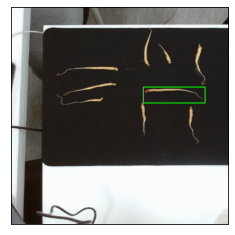

In [20]:
best = g5
frame_img = cv2.imread(frame_img_path, cv2.IMREAD_COLOR)
frame_img = cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB)
frame_img = cv2.rectangle(frame_img, (best[0][0], best[0][1]), (best[3][0], best[3][1]),(0,255,0), 3)
frame_img = cv2.circle(frame_img, (best[-1][0],best[-1][1]),5,(255,0,0), -1)
plt.xticks([]); plt.yticks([])
plt.imshow(frame_img)